In [1]:
# First check the Python version
import sys
if sys.version_info < (3,4):
    print('You are running an older version of Python!\n\n' \
          'You should consider updating to Python 3.4.0 or ' \
          'higher as the libraries built for this course ' \
          'have only been tested in Python 3.4 and higher.\n')
    print('Try installing the Python 3.5 version of anaconda '
          'and then restart `jupyter notebook`:\n' \
          'https://www.continuum.io/downloads\n\n')

# Now get necessary libraries
try:
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    from skimage.transform import resize
except ImportError:
    print('You are missing some packages! ' \
          'We will try installing them before continuing!')
    !pip install "numpy>=1.11.0" "matplotlib>=1.5.1" "scikit-image>=0.11.3" "scikit-learn>=0.17"
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    from skimage.transform import resize
    print('Done!')

# Import Tensorflow
try:
    import tensorflow as tf
except ImportError:
    print("You do not have tensorflow installed!")
    print("Follow the instructions on the following link")
    print("to install tensorflow before continuing:")
    print("")
    print("https://github.com/pkmital/CADL#installation-preliminaries")

# This cell includes the provided libraries from the zip file
try:
    from libs import utils
except ImportError:
    print("Make sure you have started notebook in the same directory" +
          " as the provided zip file which includes the 'libs' folder" +
          " and the file 'utils.py' inside of it.  You will NOT be able"
          " to complete this assignment unless you restart jupyter"
          " notebook inside the directory created by extracting"
          " the zip file or cloning the github repo.")

# We'll tell matplotlib to inline any drawn figures like so:
%matplotlib inline

In [4]:
dirname = '/Users/gerbenneven/EducationalProjects/cadl/session-1/data'

filenames = [os.path.join(dirname, filename) for filename in os.listdir(dirname)]
filenames = filenames[:200:2]

In [5]:
len(filenames)


100

In [6]:
images = [plt.imread(filename)[..., :3] for filename in filenames]

images = [utils.imcrop_tosquare(img_i) for img_i in images]

images = [resize(img_i, (100, 100)) for img_i in images]

images = np.array(images).astype(np.float32)


In [7]:
images

array([[[[ 0.69999999,  0.71176469,  0.73137254],
         [ 0.69803923,  0.70980394,  0.72941178],
         [ 0.70784312,  0.71960783,  0.73921567],
         ..., 
         [ 0.87843138,  0.86666667,  0.83137256],
         [ 0.872549  ,  0.86078429,  0.82549018],
         [ 0.88235295,  0.86666667,  0.83137256]],

        [[ 0.7019608 ,  0.71372551,  0.73333335],
         [ 0.7019608 ,  0.71372551,  0.73333335],
         [ 0.7019608 ,  0.71372551,  0.73333335],
         ..., 
         [ 0.87843138,  0.86666667,  0.83137256],
         [ 0.87843138,  0.86666667,  0.83137256],
         [ 0.89019608,  0.87450981,  0.8392157 ]],

        [[ 0.7019608 ,  0.71372551,  0.73333335],
         [ 0.7019608 ,  0.71372551,  0.73333335],
         [ 0.70980394,  0.72156864,  0.74117649],
         ..., 
         [ 0.87843138,  0.86666667,  0.84705883],
         [ 0.87843138,  0.86666667,  0.83137256],
         [ 0.88333333,  0.86764705,  0.83235294]],

        ..., 
        [[ 0.38725489,  0.34019607,

In [8]:
images.shape

(100, 100, 100, 3)

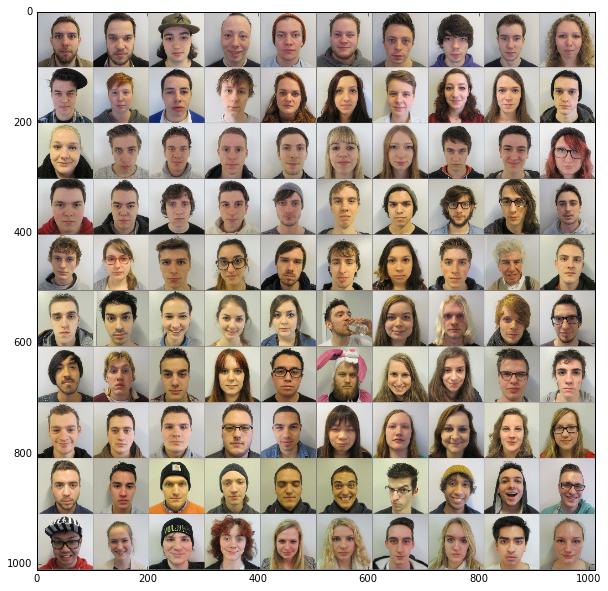

In [10]:
plt.figure(figsize=(10, 10))
plt.imshow(utils.montage(images, saveto='dataset.png'))

# Part Two - Compute the Mean


In [11]:
session = tf.Session()

mean_img_op = tf.reduce_mean(images, 0)

In [12]:
mean_img = session.run(mean_img_op)

In [13]:
mean_img.shape

(100, 100, 3)

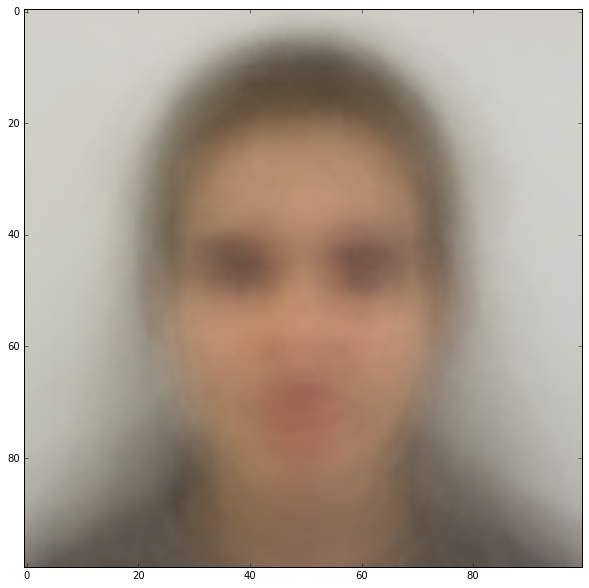

In [15]:
plt.figure(figsize=(10, 10))
plt.imshow(mean_img)
plt.imsave(arr=mean_img, fname='mean.png')

# Part Three - Compute the Standard Deviation

In [16]:
mean_img_4d = tf.reduce_mean(images, 0, True)

In [17]:
mean_img_4d.shape

AttributeError: 'Tensor' object has no attribute 'shape'

In [18]:
subtraction = images - mean_img_4d

std_img_op = tf.sqrt(tf.reduce_sum(subtraction * subtraction, 0))

std_img = session.run(std_img_op)

In [19]:
std_img.shape

(100, 100, 3)

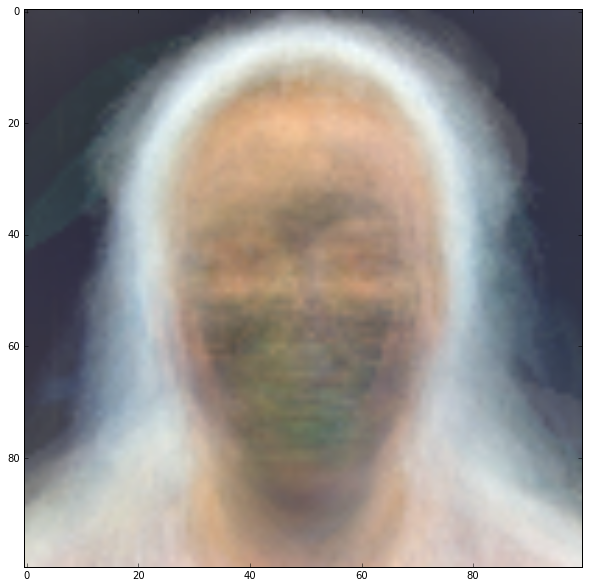

In [20]:
plt.figure(figsize=(10, 10))
std_img_show = std_img / np.max(std_img)
plt.imshow(std_img_show)
plt.imsave(arr=std_img_show, fname='std.png')

# Part Four - Normalize the Dataset

In [26]:
norm_imgs_op = tf.div(tf.sub(images, mean_img), std_img)
norm_imgs = session.run(norm_imgs_op)

In [28]:
norm_imgs.shape

(100, 100, 100, 3)

In [30]:
print(np.min(norm_imgs), np.max(norm_imgs))
print(images.dtype)

-0.777087 0.486981
float32


In [31]:
norm_imgs.shape

(100, 100, 100, 3)

In [32]:
plt.figure(figsize=(10, 10))

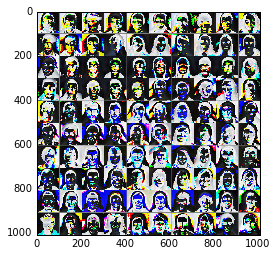

In [33]:
plt.imshow(utils.montage(norm_imgs, 'normalized.png'))

# Part Five - Convolve the Dataset